# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 19s 2us/step


In [3]:
#指定測試集與訓練資料集 
#本來是60000x28x28的資料，reshape為600000x784

#根據助教說法，因為模型背後的數學大部分是基於兩個維度的矩陣計算，所以在使用模型時reshape成2個維度
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
#宣告採用序列模型
model = Sequential()

In [67]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [68]:
model.add(Dense(units= 256, 
                activation='relu',
                input_dim=784,
                kernel_initializer='normal')) #新增一道神經網絡

In [69]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [70]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [71]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [72]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 277us/step - loss: 0.2329 - accuracy: 0.9299 - val_loss: 0.1131 - val_accuracy: 0.9672
Epoch 2/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.0931 - accuracy: 0.9716 - val_loss: 0.0959 - val_accuracy: 0.9706
Epoch 3/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 4/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0908 - val_accuracy: 0.9755
Epoch 5/10
48000/48000 [==============================] - 17s 348us/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0944 - val_accuracy: 0.9749
Epoch 6/10
48000/48000 [==============================] - 18s 376us/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.1010 - val_accuracy: 0.9744
Epoch 7/10
48000/48000 [==============================] - 

# 以圖形顯示訓練過程

In [63]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

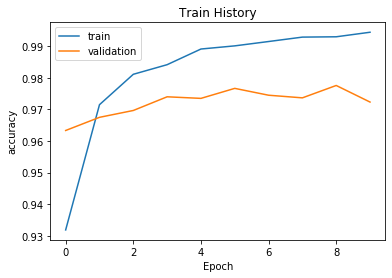

In [64]:
show_train_history(train_history,'accuracy','val_accuracy')

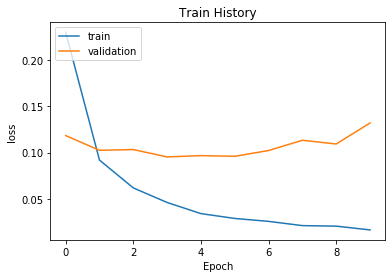

In [65]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 47us/step

accuracy= 0.9775999784469604
